# High order epistasis in yeast diploid growth rate

Initial imports. Download the `epistasis` package [here](https://www.github.com/harmslab/epistasis)

In [1]:
# Import necessary science modules
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Reset some default parameters in matplotlib
import matplotlib as mpl
mpl.rcParams["font.family"] = "Arial"
mpl.rcParams["font.size"] = 10

# Linear epistasis model
from epistasis.models.linear import LinearEpistasisModel

# Nonlinear epitasis model
from epistasis.models.nonlinear import NonlinearEpistasisModel

## Linear epistasis model

The expectation baked into a linear epistasis model is that mutations have individual effects that sum together to give the phenotype. Epistasis, then, describes deviation from this additivity when multiple mutations are measured together. 

In [16]:
linear.phenotypes

array([  0.00000000e+00,  -3.49056418e-01,  -1.94720219e-01,
        -2.84370144e-03,  -1.28979367e-02,  -1.81331879e-02,
        -4.74394489e-01,  -4.04906890e-01,  -1.45209775e-01,
        -1.32473066e-01,  -1.40457350e-01,   2.67266512e-02,
         1.04508767e-03,  -3.48320110e-01,  -1.71937473e-02,
         5.57584957e-02,   1.01557583e-01,  -5.10212862e-01,
         3.05344766e-02,  -1.49704031e-01,  -3.26019413e-01,
        -2.91562469e-01,  -6.12865130e-01,  -3.21180217e-01,
        -7.92245990e-02,   6.52562813e-02,  -7.76143949e-02,
        -3.82285726e-02,  -1.85755447e-02,  -1.64693736e-01,
         4.87255444e-02,   4.01133115e-02,  -4.45918171e-01,
        -4.00963520e-01,  -7.34867093e-01,  -3.31886303e-01,
        -1.10980965e+00,  -3.72072541e-01,  -3.62025977e-01,
        -3.02588769e-01,  -1.15601483e-03,  -4.82887738e-01,
        -2.51997359e-01,  -2.66868871e-01,  -1.81335533e-01,
        -8.11240999e-02,   1.15110184e-01,  -1.55583433e-01,
        -1.13098223e-01,

(<matplotlib.figure.Figure at 0x10bfa3d30>,
  <matplotlib.axes._subplots.AxesSubplot at 0x10c2906d8>])

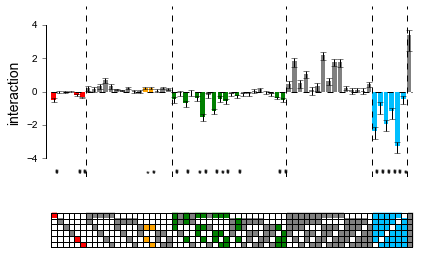

In [8]:
# Location of the data
in_path = "../../datasets/hall_mating_efficiency.json"

# Fit epistasis with linear model. 
linear = LinearEpistasisModel.from_json(in_path)
linear.fit()
linear.fit_error()

linear.Plot.interactions(sigmas=1, log_space=True, height_ratio=2)

## Nonlinear epistasis model - saturation curve

We'll "expect" that as more mutations are introduced, their effect diminishes. Thus, the effect of a mutation depends on when it is introduced in the evolutionary trajectory. To capture this saturation, we fit with the following model:

$$
F(f(\vec{x})) = \frac{A \cdot f(\vec{x})}{B + f(\vec{x})}
$$

where $f(\vec{x})$ is the phenotype assuming linear epistasis. 

Fit with a nonlinear least squares regression. 

In [9]:
def saturation(x, saturation, rate):
    """ Saturation function where X is the linear epistasis model. """
    y = (saturation  * x / ( x + rate ))
    return y

R-squared of fit: 0.84729905277
rate: 0.74188118625
saturation: 2.9255870683e-05


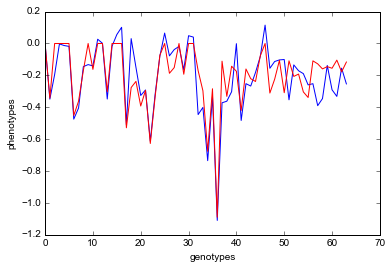

In [21]:
# Initialize a nonlinear LS regression, passing the function above.
nonlinear = NonlinearEpistasisModel.from_json(in_path, order=2, function=saturation)
nonlinear.fit_widget(saturation=(-1, 5, .1), rate=(-1,5, .1))

(<matplotlib.figure.Figure at 0x10d7c96d8>,
  <matplotlib.axes._subplots.AxesSubplot at 0x107687748>])

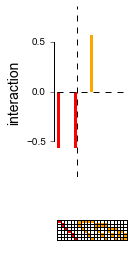

In [22]:
nonlinear.Plot.interactions(sigmas=0, figsize=(2,4), height_ratio=2, log_space=True)

(<matplotlib.figure.Figure at 0x10d765198>,
 <matplotlib.axes._subplots.AxesSubplot at 0x10c7c6c50>)

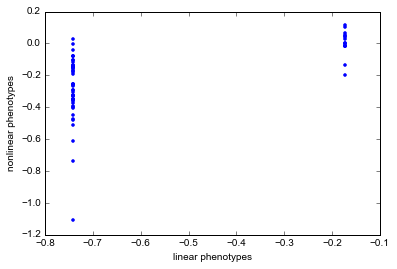

In [23]:
nonlinear.Plot.linear_phenotypes()

## Nonlinear epistasis model - Hill Model

In [24]:
def hill_equation(x, rate, hill):
    """ Saturation function where X is the linear epistasis model. """
    y = ( 1.0 / ((rate/x)**hill + 1))
    return y

R-squared of fit: nan
hill: 1.9
rate: -0.1


/Users/Zsailer/virtual/py3/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in power
  app.launch_new_instance()
/Users/Zsailer/virtual/py3/lib/python3.5/site-packages/scipy/optimize/minpack.py:601: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


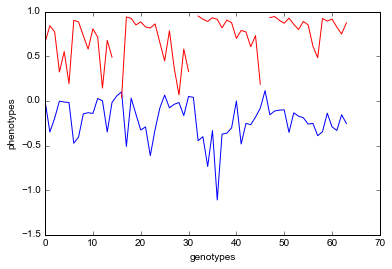

In [25]:
# Initialize a nonlinear LS regression, passing the function above.
nonlinear = NonlinearEpistasisModel.from_json(in_path, order=1, function=hill_equation)
nonlinear.fit_widget(rate=(-1, 1, .1), hill=(0, 4, .1))

(<matplotlib.figure.Figure at 0x10d8699e8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x10d7fdb38>)

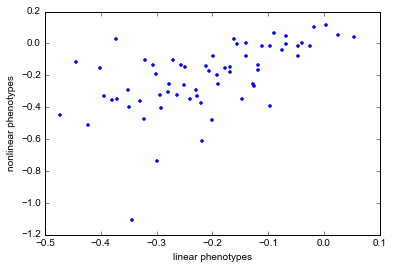

In [26]:
nonlinear.Plot.linear_phenotypes()

(<matplotlib.figure.Figure at 0x10b8083c8>,
  <matplotlib.axes._subplots.AxesSubplot at 0x10b855ba8>])

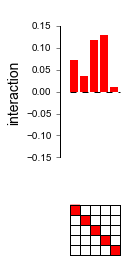

In [10]:
nonlinear.Plot.interactions(sigmas=0, figsize=(2,4), height_ratio=2, log_space=True)